# Clipping data


Another way to limit the data except selecting, is clipping the data based on another feature.

In [17]:
import geopandas as gp
import matplotlib.pyplot as plt
from pathlib import Path

INPUT = Path.cwd().parents[0] / "00_data"
OUTPUT = Path.cwd().parents[0] / "out"
OUTPUT.mkdir(exist_ok=True)

gdb_path = INPUT / "LBM_2018_IS_DD_gdb" / "LBM_2018_IS_DD.gdb"

For this reason the packages geopandas and matplotlib are imported.

Then the path to the original dataset and the fetaure that based on that the layer should be limited will be defined:

In [5]:
original_layer = gp.read_file(gdb_path, layer="LBM2018_IS_DD")
clipping_layer = gp.read_file(INPUT / "layers" / "border.shp")

Then using the function clip in geopandas package the dataset will be clipped, by defining the original layer and the clip layer. 

In [6]:
clipped_layer = gp.clip(original_layer, clipping_layer)

Then the interested part of the dataset will be printed.

In [8]:
clipped_layer.head(3)

,KS_IS,CLC_st1,CLC18,CLC,Biotpkt2018,Shape_Length,Shape_Area,geometry
204,SV,122,None,NaN,5.271487,487783.286284,2.869516e+06,"POLYGON ((401808.569 5661532.707, 401859.892 5..."
14228,None,231,231,231.0,10.981298,1385.654150,1.235155e+04,"POLYGON ((403104.213 5657996.304, 403105.003 5..."
14203,None,231,231,231.0,10.981298,2978.763179,4.237039e+04,"POLYGON ((403076.477 5658033.218, 403036.719 5..."


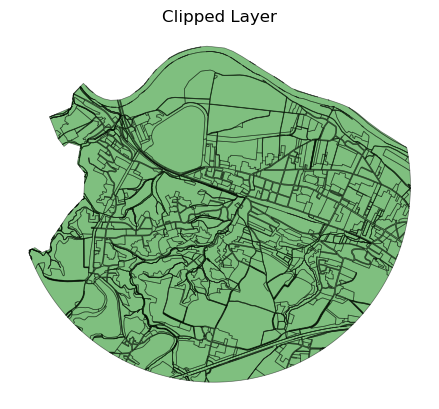

In [15]:
ax = clipped_layer.plot(color="green", linewidth=0.5, alpha=0.5, edgecolor="black")
ax.set_title("Clipped Layer")
ax.set_axis_off()

The result could be saved as different formats. It is just needed to define the output path and export it based on the interested format.

- shapefile format

In [18]:
output_shp = OUTPUT / "clipped.shp"
clipped_layer.to_file(output_shp)

/tmp/ipykernel_1347/2593102682.py:2: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  clipped_layer.to_file(output_shp)
/opt/conda/envs/worker_env/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Biotpkt2018' to 'Biotpkt201'
  ogr_write(
/opt/conda/envs/worker_env/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Normalized/laundered field name: 'Shape_Length' to 'Shape_Leng'
  ogr_write(


- Geodatabase format

ToDo: GeoDataBase Format is not an open format. Better would be to introduce `GPKG` (geopackage) here.

In [23]:
output_gdb = OUTPUT / "clipped.gpkg"
clipped_layer.to_file(
    output_gdb, 
    layer="clipped_layer",
    driver="GPKG")

- CSV format

```{caution} 
If the layer doesn't have a geometry column as Well Known Text format, first it should be converted.
```

For converting the geometry first an accesses to the geometry column of the GeoDataFrame is needed, then using apply function, to each geometry in the column, the geometry converts to the string format for spatial data. 

In [24]:
clipped_layer["geometry"] = clipped_layer["geometry"].apply(lambda geom: geom.wkt)

/tmp/ipykernel_1347/146743853.py:1: UserWarning: Geometry column does not contain geometry.
  clipped_layer["geometry"] = clipped_layer["geometry"].apply(lambda geom: geom.wkt)


Then the path for the output defined:

In [27]:
csv_path = OUTPUT / "clipped_layer.csv"

Then the data executed as csv file, if the index as a unique value is not needed, the index parameter can change to `False`.

In [28]:
clipped_layer.to_csv(csv_path, index=True)